# Credit Card Fraud Detection

1. **Load Data**
    - a. Import Libraries
    - b. Load Data
    - c. Parse Header and Row Data
2. **Preprocess**
    - a. Check for Data Types
    - b. Check for Data Distribution
    - c. Check for Data Correlation
    - d. Check for Data Skewness
    - e. Check for Data Normalization
        - i. Normalization
    - f. Check for Data Standardization
    - g. Discretization
    - h. Impuation
3. **Feature Selection**
    - a. Feature Selection
        - i. Filter Method
        - ii. Wrapper Method
        - iii. Stepwise Recursive Selection
    - b. Feature Extraction (Agglomeration) (Dimensionality Reduction)
        - i. Smushing features together by using PCA or Hierarchical Clustering
    - c. Feature Engineering
        - i. Create new features
            - Deep Learning
            - Manual Feature Engineering
4. **Train Model**
    - a. Train Model
        - i. Train Test Split
        - ii. Cross Validation
        - iii. Train Model
5. **Evaluate Model**
    - a. Evaluate Model
        - i. Accuracy
        - ii. Precision
        - iii. Recall
        - iv. F1 Score
        - v. ROC AUC
        - vi. Confusion Matrix
        - vii. Classification Report


### Import Libraries and Loading Data

In [13]:
#Importing Libraries

import sys
import csv
import os
from operator import itemgetter
import time
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder, WOEEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

# Loading Data
train_data = pd.read_csv('fraudTrain.csv', index_col='Unnamed: 0')
test_data = pd.read_csv('fraudTest.csv', index_col='Unnamed: 0')
# train_data
# train_data.head()

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [15]:
train_data.describe().round()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1.296675e+06,1296675.0,1296675.0,1296675.0
mean,4.171920e+17,70.0,48801.0,39.0,-90.0,88824.0,1.349244e+09,39.0,-90.0,0.0
std,1.308806e+18,160.0,26893.0,5.0,14.0,301956.0,1.284128e+07,5.0,14.0,0.0
min,6.041621e+10,1.0,1257.0,20.0,-166.0,23.0,1.325376e+09,19.0,-167.0,0.0
25%,1.800429e+14,10.0,26237.0,35.0,-97.0,743.0,1.338751e+09,35.0,-97.0,0.0
50%,3.521417e+15,48.0,48174.0,39.0,-87.0,2456.0,1.349250e+09,39.0,-87.0,0.0
75%,4.642255e+15,83.0,72042.0,42.0,-80.0,20328.0,1.359385e+09,42.0,-80.0,0.0
max,4.992346e+18,28949.0,99783.0,67.0,-68.0,2906700.0,1.371817e+09,68.0,-67.0,1.0


Yes:  7506
No:  1289169


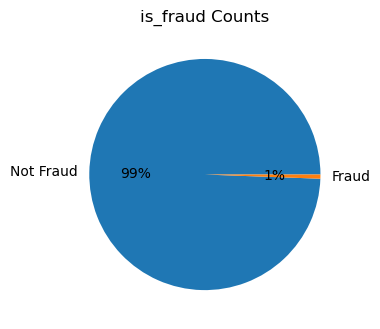

In [26]:
is_fraud = train_data["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

is_fraud = train_data["is_fraud"].value_counts()
plt.figure(figsize=(7, 10))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["Not Fraud", "Fraud"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Highly imbalanced dataset. 1% of the data is fraud, will need to use undersampling, oversampling, or SMOTE to balance the data.

Gender Correlations?

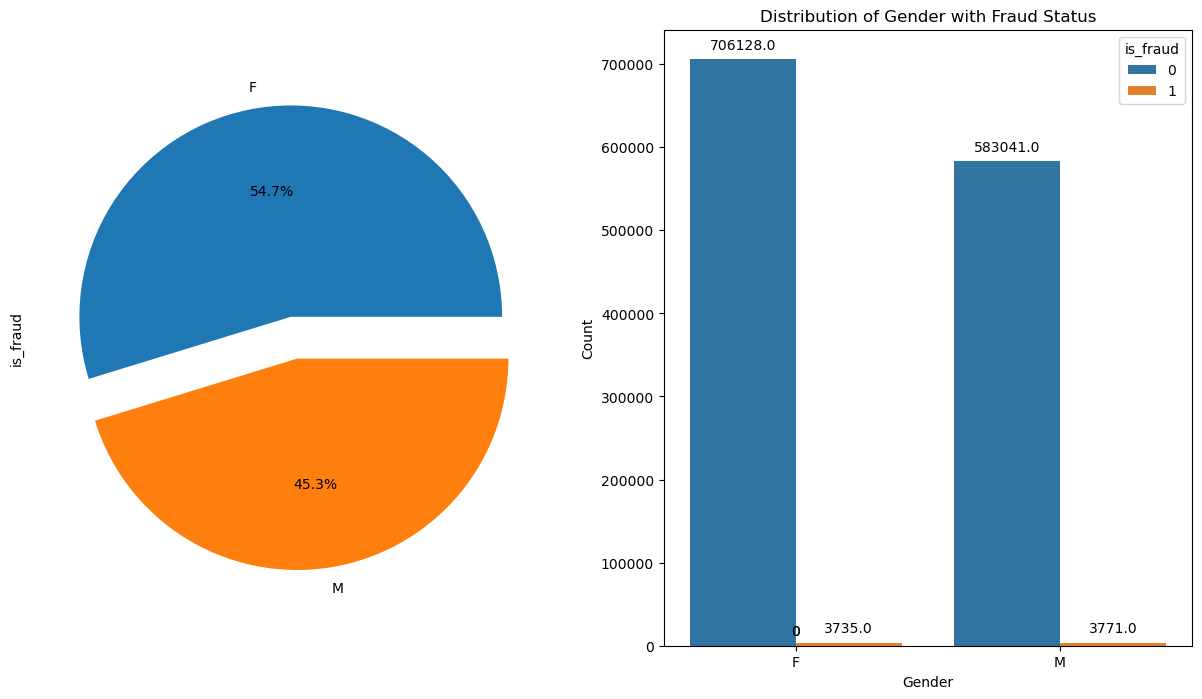

In [31]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train_data.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train_data,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [2]:
# Identify non-numeric columns
non_numeric_cols = train_data.select_dtypes(exclude=['int', 'float']).columns
print(non_numeric_cols)

# Remove non-numeric columns
df_numeric_only = train_data.drop(columns=non_numeric_cols)
df_numeric_only.head()

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


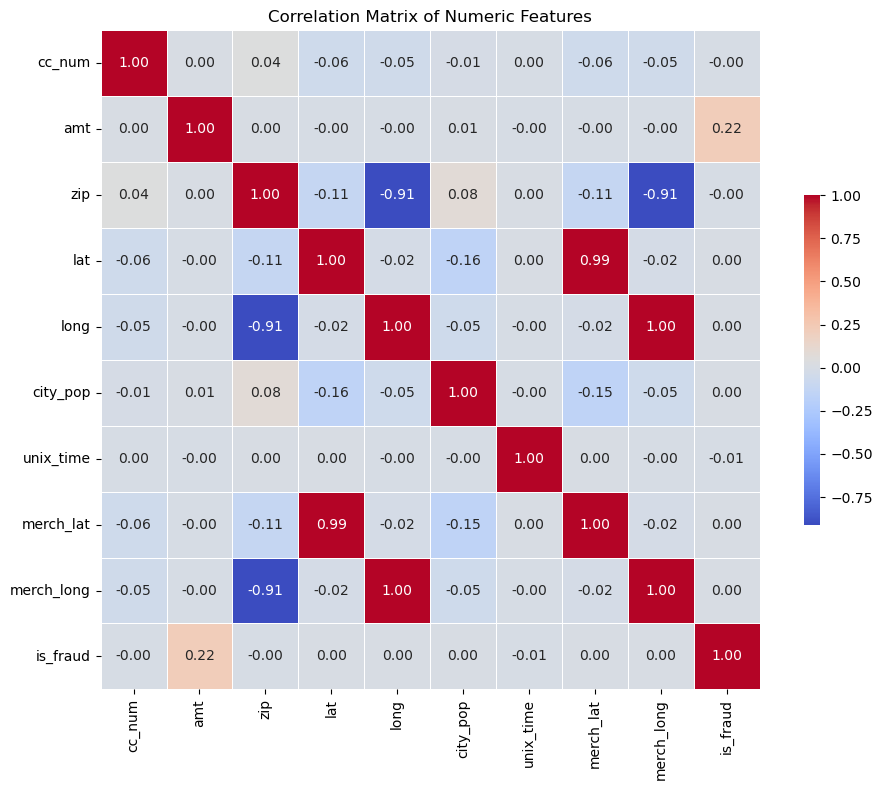

In [3]:
corr = df_numeric_only.corr()  # Compute the correlation matrix
# corr = train_data.corr()  # Compute the correlation matrix

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

See that correlation matrix does not help much, see some correlation between amt and class, but not much else.

In [2]:
#Change date type from obj to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# New columns for Hour and Month
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

train_data['month'] = train_data['trans_date_trans_time'].dt.month
test_data['month'] = test_data['trans_date_trans_time'].dt.month

train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


Split the time feature into hours and month as it was a string variable.

Create a data distribution plot to see the distribution of the data.

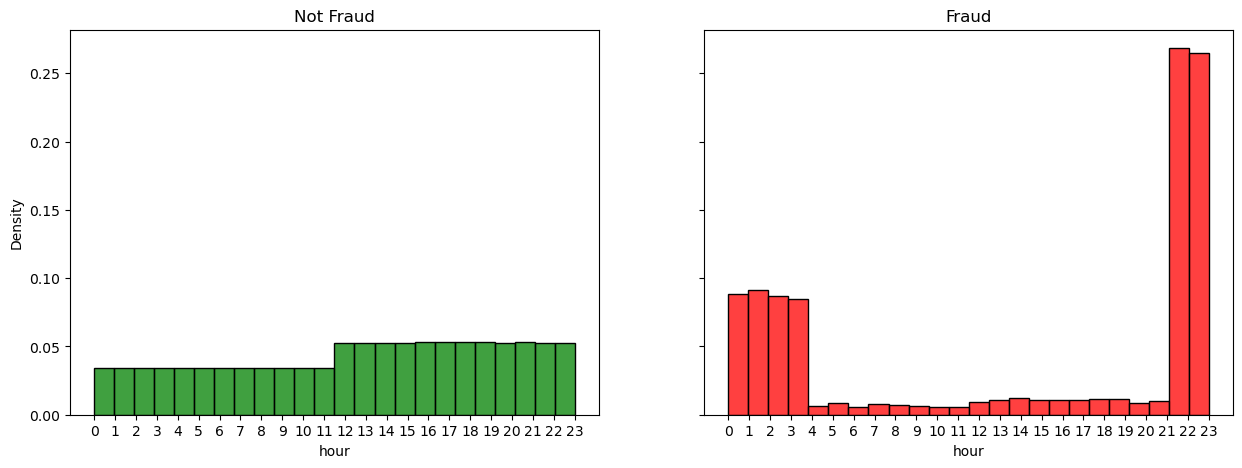

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train_data[train_data["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="green")

ax2 = sns.histplot(x='hour', data=train_data[train_data["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));

Looks like fraud is more likely to happen in the last 2 hours of the day and does not occur during the daytime.

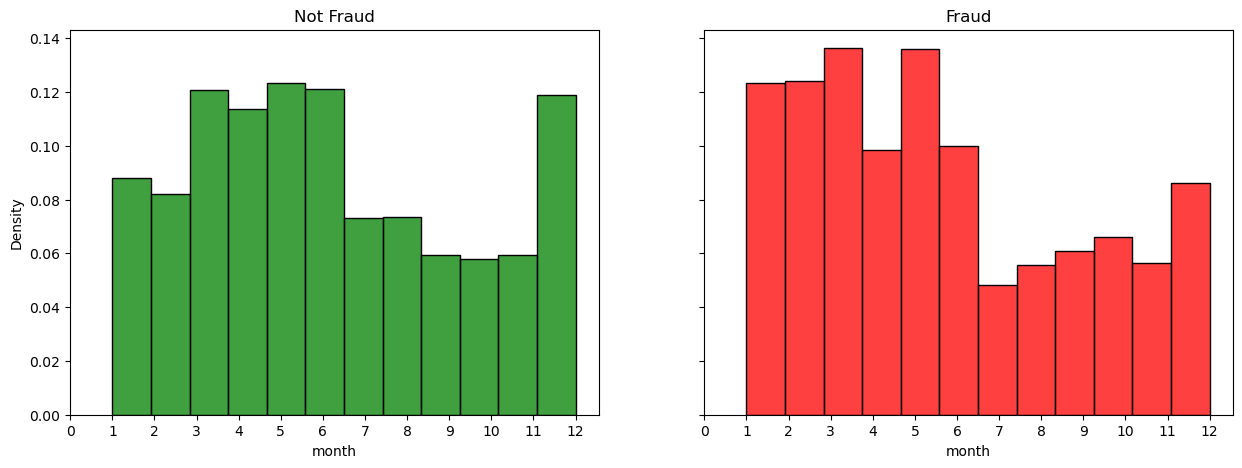

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1, color="green")

ax2 = sns.histplot(x='month', data=train_data[train_data["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(13)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(13));

Fraud usually occurs near the early months of the year.

## Checking Category Distribution

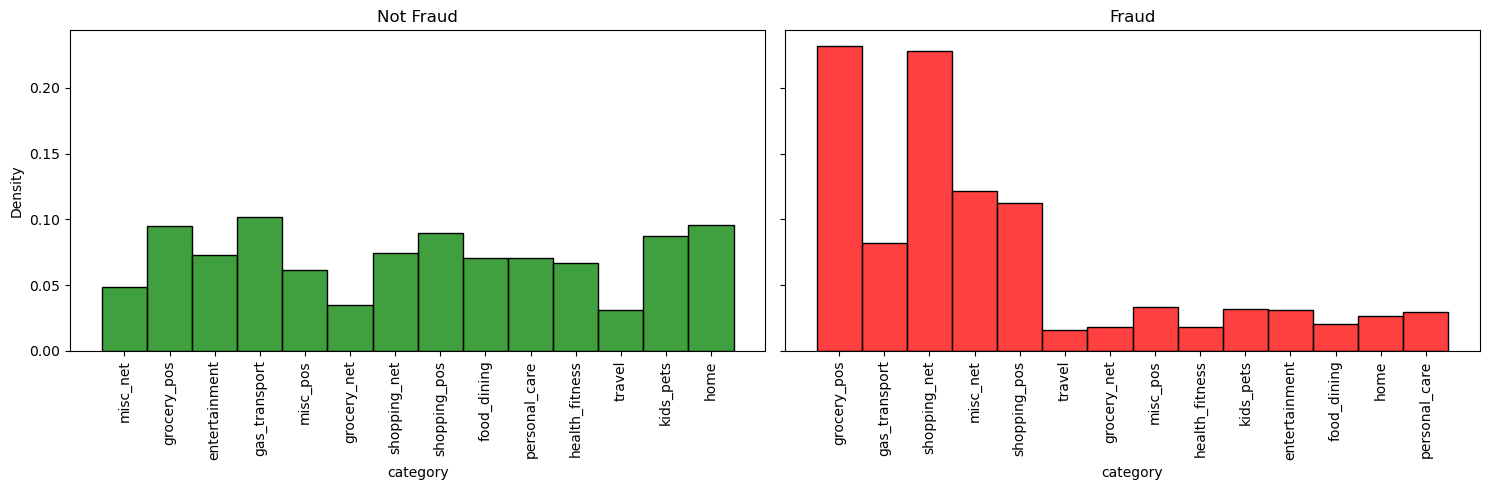

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the figure with two subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot distribution of the 'category' feature for non-fraudulent transactions
sns.histplot(x='category', data=train_data[train_data["is_fraud"] == 0], 
             stat="density", ax=ax1, color="green", discrete=True)
ax1.set_title("Not Fraud")
ax1.tick_params(axis='x', rotation=90)  # Rotate X-axis labels for better readability

# Plot distribution of the 'category' feature for fraudulent transactions
sns.histplot(x='category', data=train_data[train_data["is_fraud"] == 1], 
             stat="density", ax=ax2, color="red", discrete=True)
ax2.set_title("Fraud")
ax2.tick_params(axis='x', rotation=90)  # Rotate X-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## Job Distribution

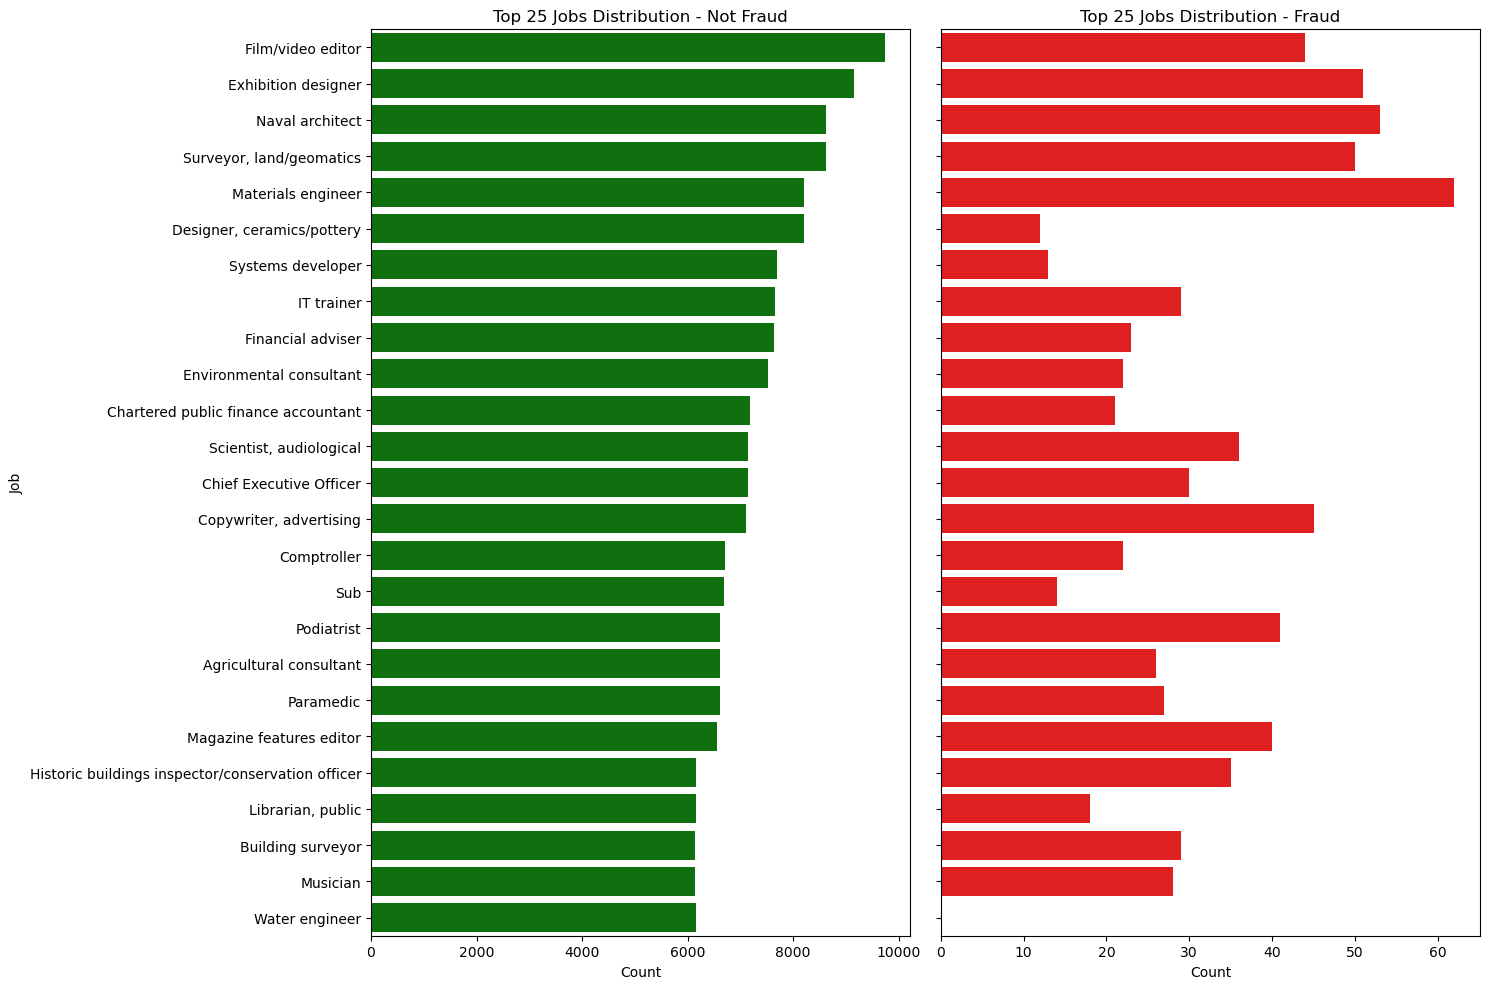

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_data' is your DataFrame and it contains 'job' and 'is_fraud' columns

# Get the top 25 most common jobs
top_jobs = train_data['job'].value_counts().head(25).index

# Create the plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)  # Increased figsize for better visibility

# Plotting the distribution of 'job' for non-fraudulent transactions
sns.countplot(y='job', data=train_data[(train_data["is_fraud"] == 0) & (train_data['job'].isin(top_jobs))],
              ax=ax1, color="green", order=top_jobs)
ax1.set_title("Top 25 Jobs Distribution - Not Fraud")
ax1.set_xlabel("Count")
ax1.set_ylabel("Job")

# Plotting the distribution of 'job' for fraudulent transactions
sns.countplot(y='job', data=train_data[(train_data["is_fraud"] == 1) & (train_data['job'].isin(top_jobs))],
              ax=ax2, color="red", order=top_jobs)
ax2.set_title("Top 25 Jobs Distribution - Fraud")
ax2.set_xlabel("Count")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


Removing non-numeric columns and scaling the data.

In [3]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']

train_data = train_data.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)
train_data.head(2)

#clean merchant column
train_data['merchant'] = train_data['merchant'].apply(lambda x : x.replace('fraud_',''))

train_data.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


Data Encoding, since there is a lot of unique categorical values... will need to use one hot encoding for gender and Weight of Evidence encoding for the rest as it works best for binary classification problems

In [4]:
# applying label encoding
train_data['gender'] = train_data['gender'].map({'F': 0, 'M': 1})

# Initialize the encoder
woe_encoder = WOEEncoder()

# Encode each specified column separately and replace it in the DataFrame
for col in ['job', 'merchant', 'category', 'lat', 'last']:
    # The encoded column replaces the original
    train_data[col] = woe_encoder.fit_transform(train_data[[col]], train_data['is_fraud'])

c:\Users\Aahad\anaconda3\envs\minimal_ds\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\Aahad\anaconda3\envs\minimal_ds\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

c:\Users\Aahad\anaconda3\envs\minimal_ds\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\Aahad\anaconda3\envs\minimal_ds\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [11]:
train_data.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1


Deal with Class Imbalance

Downsampling the data to balance the data. RUN THIS FOR DOWNSAMPLE

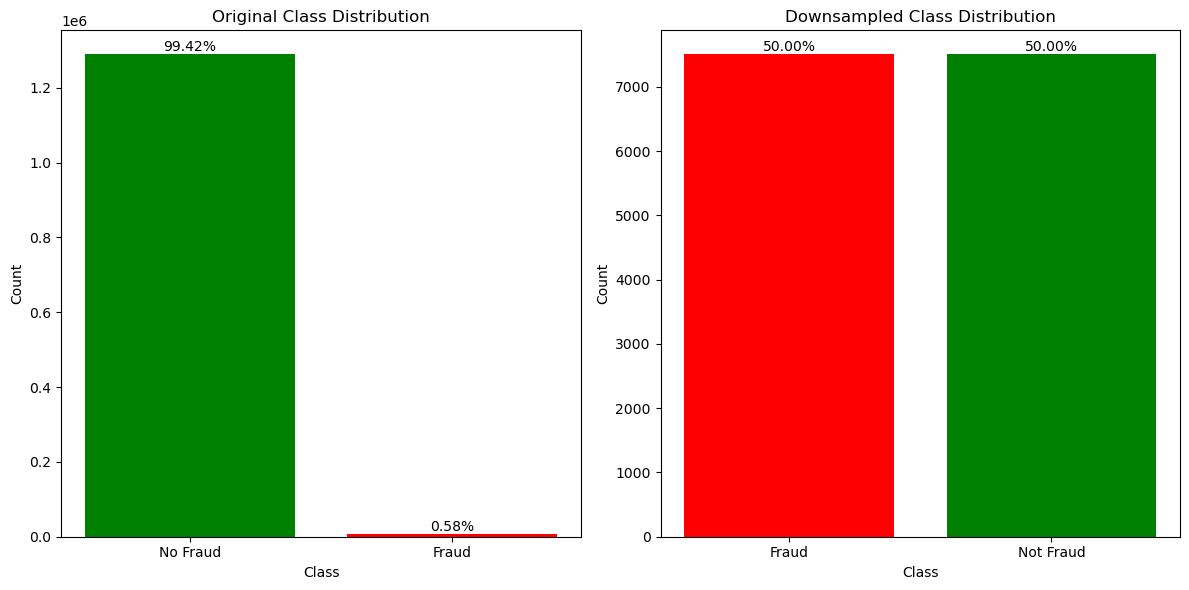

In [5]:
No_class = train_data[train_data["is_fraud"]==0]
yes_class = train_data[train_data["is_fraud"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)


X = down_samples.drop("is_fraud", axis=1)
y = down_samples["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Count the occurrences of each class in the original dataset
original_class_counts = train_data["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_data) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['green', 'red'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['green', 'red'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

Fraudulent:  1517
Not Fraud:  1486


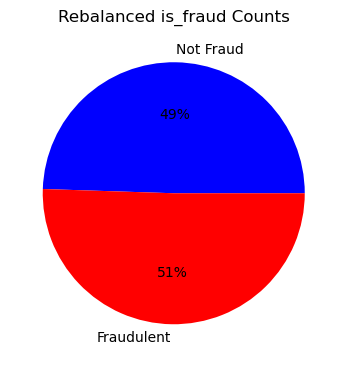

In [16]:
# Assuming 'y_smote' is your target variable after rebalancing
reb_balanced_counts = Counter(y_test)
print("Fraudulent: ", reb_balanced_counts[1])
print("Not Fraud: ", reb_balanced_counts[0])

# Plotting the rebalanced class distribution
reb_is_fraud = [reb_balanced_counts[0], reb_balanced_counts[1]]  # Reorder counts if necessary
plt.figure(figsize=(7, 10))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(reb_is_fraud, labels=["Not Fraud", "Fraudulent"], autopct="%0.0f%%", colors=['blue', 'red'])
plt.title("Rebalanced is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Now Upsampling (RUN THIS FOR UPSAMPLING)

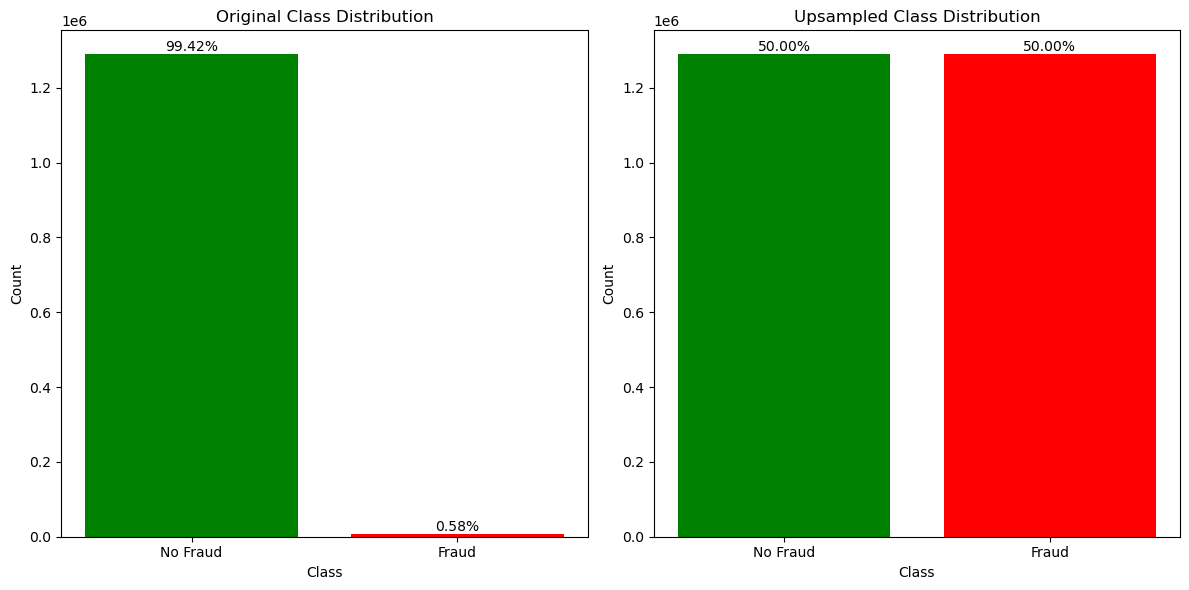

In [23]:
# Assuming 'train_data' is your DataFrame
No_class = train_data[train_data["is_fraud"] == 0]
yes_class = train_data[train_data["is_fraud"] == 1]

# Upsample the minority class
yes_class_upsampled = resample(yes_class,
                               replace=True,     # sample with replacement
                               n_samples=len(No_class),    # match number in majority class
                               random_state=123) # reproducible results

# Combine the upsampled minority class with the majority class
upsampled = pd.concat([No_class, yes_class_upsampled])

# Splitting features and labels
X = upsampled.drop("is_fraud", axis=1)
y = upsampled["is_fraud"]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Upsampling the minority class in the dataset
yes_class_upsampled = resample(yes_class, 
                               replace=True,      # sample with replacement
                               n_samples=len(No_class),    # to match majority class
                               random_state=123) # for reproducible results

upsampled = pd.concat([No_class, yes_class_upsampled])

# Now, calculate the class counts and percentages for plotting
upsampled_class_counts = upsampled["is_fraud"].value_counts()
upsampled_percentages = upsampled_class_counts / len(upsampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['green', 'red'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for upsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(upsampled_class_counts.index, upsampled_class_counts.values, color=['green', 'red'])
for bar, label in zip(bars_2, upsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Upsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(upsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


Using SMOTE to rebalance the data. RUN THIS FOR SMOTE

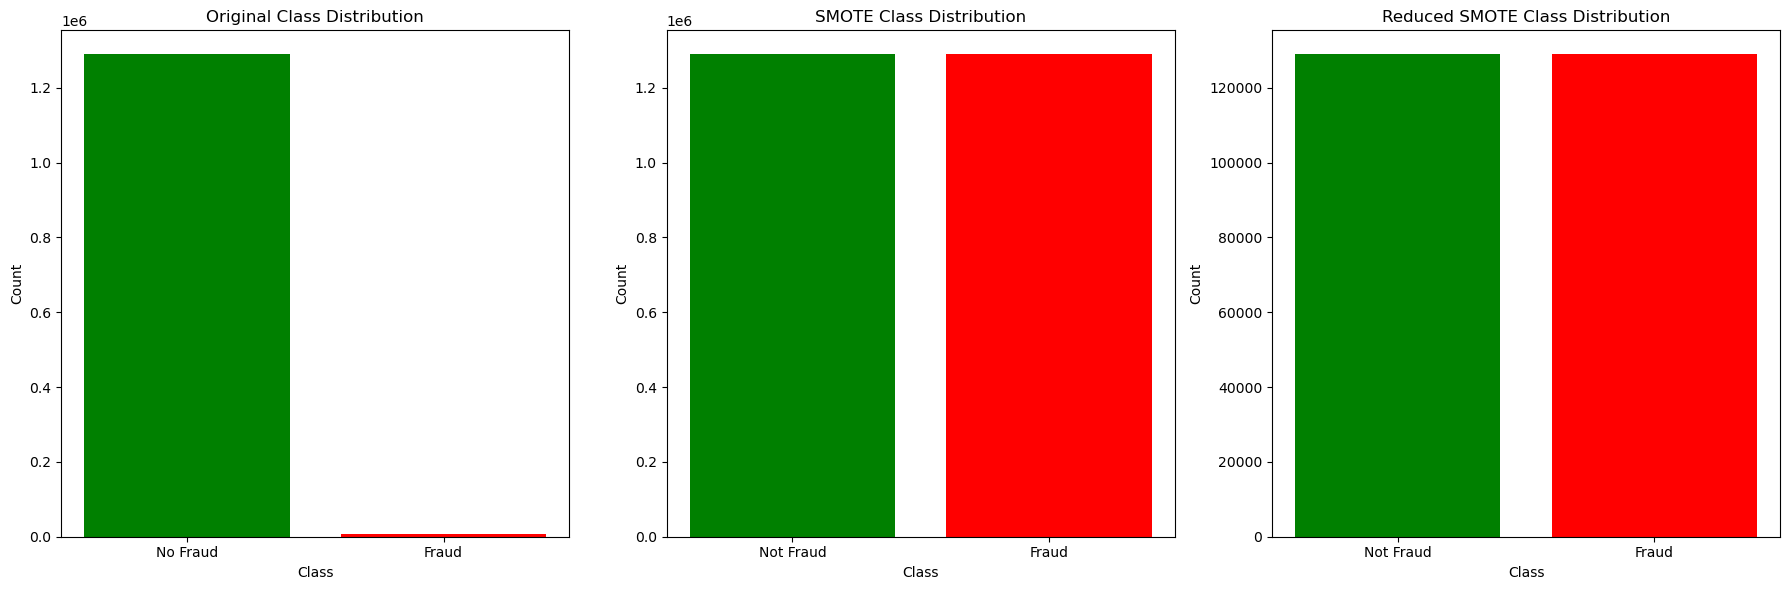

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Assuming 'train_data' is your DataFrame and 'is_fraud' is the target variable
X = train_data.drop("is_fraud", axis=1)
y = train_data["is_fraud"]

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Reduce the size of the SMOTE-resampled dataset by half
n_samples = int(0.1 * X_smote.shape[0])  # Calculate the new sample size: half of the resampled dataset
X_smote_reduced, y_smote_reduced = resample(X_smote, y_smote, n_samples=n_samples, random_state=42, stratify=y_smote)

# Split the reduced SMOTE-resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_reduced, y_smote_reduced, test_size=0.2, random_state=42)

# Optional: Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Count the occurrences of each class in the original dataset, the SMOTE-resampled dataset, and the reduced dataset
original_class_counts = Counter(y)
smote_class_counts = Counter(y_smote)
reduced_smote_class_counts = Counter(y_smote_reduced)

# Plotting the class distribution before and after applying SMOTE and after reduction
plt.figure(figsize=(18, 6))

# Bar chart for original class distribution
plt.subplot(1, 3, 1)
bars_1 = plt.bar(original_class_counts.keys(), original_class_counts.values(), color=['green', 'red'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(original_class_counts.keys()), ['No Fraud', 'Fraud'])

# Bar chart for SMOTE class distribution
plt.subplot(1, 3, 2)
bars_2 = plt.bar(smote_class_counts.keys(), smote_class_counts.values(), color=['green', 'red'])
plt.title('SMOTE Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(smote_class_counts.keys()), ['Not Fraud', 'Fraud'])

# Bar chart for Reduced SMOTE class distribution
plt.subplot(1, 3, 3)
bars_3 = plt.bar(reduced_smote_class_counts.keys(), reduced_smote_class_counts.values(), color=['green', 'red'])
plt.title('Reduced SMOTE Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(reduced_smote_class_counts.keys()), ['Not Fraud', 'Fraud'])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Feature Selection

Using Wrapper based feature selection to select the best features for the model from several ML models: Extreme Gradient Boost, Random Forest, SVM, and Logistic Regression.

Logistic Regression Feature Selection (Lasso Regression)

In [59]:
# Initialize Logistic Regression with L1 penalty (Lasso regularization)
# The 'C' parameter controls the amount of regularization (lower values mean stronger regularization)
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Use SelectFromModel to select features based on importance weights
model = SelectFromModel(logreg, prefit=True)

# Transform training and testing sets so only the selected features are retained
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# The mask of selected features
selected_features = model.get_support()

# Assuming X is your original DataFrame of features before any splitting
original_feature_names = X.columns

# Get the mask of selected features
selected_features_mask = model.get_support()

# Map back to the original feature names using the mask
selected_feature_names = original_feature_names[selected_features_mask]

print("Selected features based on Logistic Regression with Lasso Regression:", selected_feature_names)

# Selected features based on Logistic Regression with Lasso Regression: Index(['merchant', 'category', 'amt', 'last', 'gender', 'lat', 'long', 'city_pop', 'job', 'merch_long', 'hour', 'month'], dtype='object')




Selected features based on Logistic Regression with Lasso Regression: Index(['merchant', 'category', 'amt', 'last', 'gender', 'lat', 'long',
       'city_pop', 'job', 'merch_long', 'hour', 'month'],
      dtype='object')


### Selected features based on Logistic Regression with Lasso Regression: Index(['merchant', 'category', 'amt', 'last', 'gender', 'lat', 'long', 'city_pop', 'job', 'merch_long', 'hour', 'month'], dtype='object')


# Using Random Forest Feature Selection Wrapper Based

In [60]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier to the training data
rf_clf.fit(X_train, y_train)

# Use SelectFromModel to select features based on importance weights
model = SelectFromModel(rf_clf, prefit=True)

# Transform training and testing sets so only the selected features are retained
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# The mask of selected features
selected_features = model.get_support()

# Assuming 'X' is your original DataFrame of features before any splitting
# This retrieves the original feature names
original_feature_names = X.columns

# Map back to the original feature names using the mask
selected_feature_names = original_feature_names[selected_features]

print("Selected features based on Random Forest importance:", selected_feature_names)

Selected features based on Random Forest importance: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')


### Selected features based on Random Forest importance: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')

# Using XGBoost Feature Selection Wrapper Based

In [65]:
# Initialize XGBoost and fit the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Select features using XGBoost importance
model = SelectFromModel(xgb, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Identify selected features
selected_features = model.get_support()
selected_feature_names = X.columns[selected_features]

print("Selected features based on XGBoost:", selected_feature_names)

Selected features based on XGBoost: Index(['category', 'amt', 'hour'], dtype='object')


### Selected features based on XGBoost: Index(['category', 'amt', 'hour'], dtype='object')

# SVM Feature Selection Wrapper Based

In [67]:
from sklearn.svm import LinearSVC
# Initialize Linear SVM Classifier
svc = LinearSVC(C=0.01, penalty="l1", dual=False, random_state=42).fit(X_train, y_train)

# Use SelectFromModel to select features based on importance weights
model = SelectFromModel(svc, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# The mask of selected features
selected_features = model.get_support()

# Extract feature names
selected_feature_names = X.columns[selected_features]

print("Selected features based on Linear SVM:", selected_feature_names)

Selected features based on Linear SVM: Index(['merchant', 'category', 'amt', 'last', 'gender', 'city_pop', 'job',
       'hour', 'month'],
      dtype='object')


### Selected features based on Linear SVM: Index(['merchant', 'category', 'amt', 'last', 'gender', 'city_pop', 'job', 'hour', 'month'],
      dtype='object')

# Cross Validation and Model Training

In [16]:
print(X_train[:3])
print(y_train[:3])

[[-1.89984628 -0.76747722 -0.77737876 -0.64186267  1.04603216  1.07234479
   1.41460083 -0.2224833  -0.68310792  0.96779343  1.36332017  0.54500442
  -0.83083323]
 [-0.80059636 -0.9317279  -0.78278241  1.43638056  1.04603216 -1.62810706
   0.03384839 -0.29134336 -0.52865099 -1.67022575 -0.01418916  0.66404526
   1.77976945]
 [ 0.41634214  0.24810687  1.9348256   0.59045623  1.04603216  0.7545677
  -0.26745245 -0.26666885  0.61477461  0.61343113 -0.31428748  1.1402086
   0.90956856]]
1058755    0
805428     0
622406     1
Name: is_fraud, dtype: int64


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Setup cross-validation classifier scorers
scorers = {'Accuracy': make_scorer(accuracy_score), 'roc_auc': 'roc_auc'}

# Initialize classifiers
classifiers = {
    "SVM": SVC(kernel='linear', gamma='scale', C=1, probability=True, random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=None),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=None)
}

# Perform cross-validation and print results
for name, clf in classifiers.items():
    start_ts = time.time()
    scores = cross_validate(clf, X_train, y_train, scoring=scorers, cv=5)
    scores_Acc = scores['test_Accuracy']
    print(f"{name} Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))
    if 'test_roc_auc' in scores:
        scores_AUC = scores['test_roc_auc']
        print(f"{name} AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    print(f"CV Runtime for {name}:", time.time() - start_ts, "\n")

SVM Acc: 0.86 (+/- 0.01)
SVM AUC: 0.89 (+/- 0.01)
CV Runtime for SVM: 61.16186881065369 

Random Forest Acc: 0.96 (+/- 0.00)
Random Forest AUC: 0.99 (+/- 0.00)
CV Runtime for Random Forest: 20.882052421569824 

XGBoost Acc: 0.96 (+/- 0.01)
XGBoost AUC: 0.99 (+/- 0.00)
CV Runtime for XGBoost: 0.6109991073608398 

Logistic Regression Acc: 0.85 (+/- 0.01)
Logistic Regression AUC: 0.91 (+/- 0.01)
CV Runtime for Logistic Regression: 0.2706623077392578 



### Downsampling (No Feature Selection)
SVM Acc: 0.86 (+/- 0.01)
SVM AUC: 0.89 (+/- 0.01)
CV Runtime for SVM: 61.16186881065369 

Random Forest Acc: 0.96 (+/- 0.00)
Random Forest AUC: 0.99 (+/- 0.00)
CV Runtime for Random Forest: 20.882052421569824 

XGBoost Acc: 0.96 (+/- 0.01)
XGBoost AUC: 0.99 (+/- 0.00)
CV Runtime for XGBoost: 0.6109991073608398 

Logistic Regression Acc: 0.85 (+/- 0.01)
Logistic Regression AUC: 0.91 (+/- 0.01)
CV Runtime for Logistic Regression: 0.2706623077392578 

# Downsampling (Wrapper Based Feature Selection)

In [22]:
# Setup cross-validation classifier scorers
scorers = {'Accuracy': make_scorer(accuracy_score), 'roc_auc': 'roc_auc'}

# Base estimator for feature selection
base_estimator = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=1)

# Initialize classifiers
classifiers = {
    "SVM": SVC(kernel='linear', gamma='scale', C=1, probability=True, random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Perform cross-validation with feature selection and print results
for name, clf in classifiers.items():
    start_ts = time.time()
    
    # Feature Selection
    selector = SelectFromModel(base_estimator, prefit=False, threshold='mean', max_features=None).fit(X_train, y_train)
    X_new = selector.transform(X_train)
    
    # Identify selected features
    selected_features = X.columns[selector.get_support()]
    print(f"Selected features by {name}: {selected_features}")
    
    # Validate the classifier on selected features
    scores = cross_validate(clf, X_new, y_train, scoring=scorers, cv=5)
    scores_Acc = scores['test_Accuracy']
    print(f"{name} Acc (with feature selection): %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))
    
    if 'test_roc_auc' in scores:
        scores_AUC = scores['test_roc_auc']
        print(f"{name} AUC (with feature selection): %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))
    
    print(f"CV Runtime for {name} (with feature selection):", time.time() - start_ts, "\n")


Selected features by SVM: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
SVM Acc (with feature selection): 0.86 (+/- 0.01)
SVM AUC (with feature selection): 0.83 (+/- 0.02)
CV Runtime for SVM (with feature selection): 76.55441474914551 

Selected features by Random Forest: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Random Forest Acc (with feature selection): 0.97 (+/- 0.00)
Random Forest AUC (with feature selection): 1.00 (+/- 0.00)
CV Runtime for Random Forest (with feature selection): 23.98932194709778 

Selected features by XGBoost: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
XGBoost Acc (with feature selection): 0.96 (+/- 0.01)
XGBoost AUC (with feature selection): 0.99 (+/- 0.00)
CV Runtime for XGBoost (with feature selection): 7.0188188552856445 

Selected features by Logistic Regression: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Logistic Regression Acc (with feature selection): 0.85 (+/- 0.01)
Logistic R

# Downsampling (Wrapper Based Feature Selection):

Selected features by SVM: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
SVM Acc (with feature selection): 0.86 (+/- 0.01)
SVM AUC (with feature selection): 0.83 (+/- 0.02)
CV Runtime for SVM (with feature selection): 76.55441474914551 

Selected features by Random Forest: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Random Forest Acc (with feature selection): 0.97 (+/- 0.00)
Random Forest AUC (with feature selection): 1.00 (+/- 0.00)
CV Runtime for Random Forest (with feature selection): 23.98932194709778 

Selected features by XGBoost: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
XGBoost Acc (with feature selection): 0.96 (+/- 0.01)
XGBoost AUC (with feature selection): 0.99 (+/- 0.00)
CV Runtime for XGBoost (with feature selection): 7.0188188552856445 

Selected features by Logistic Regression: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Logistic Regression Acc (with feature selection): 0.85 (+/- 0.01)
Logistic Regression AUC (with feature selection): 0.86 (+/- 0.01)
CV Runtime for Logistic Regression (with feature selection): 7.1257240772247314 

In [23]:
# Setup cross-validation classifier scorers
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
rand_st = 42  # Random state for reproducibility

# Define classifiers
classifiers = {
    "SVM": SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=rand_st),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', random_state=rand_st)  # Using liblinear for l1 penalty
}

# Perform feature selection and cross-validation for each classifier
for name, clf in classifiers.items():
    start_ts = time.time()
    
    # Initialize SelectFromModel with each classifier
    sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)
    sel.fit(X_train, y_train)  # Fit model to data
    
    # Transform data to only selected features
    X_train_sel = sel.transform(X_train)
    X_test_sel = sel.transform(X_test)
    
    # Extract and print the names of the selected features
    selected_features = X.columns[sel.get_support()]
    print(f"Selected features by {name}: {selected_features}")
    
    # Perform cross-validation using the selected features
    scores = cross_validate(clf, X_train_sel, y_train, scoring=scorers, cv=5)
    scores_Acc = scores['test_Accuracy']
    scores_AUC = scores['test_roc_auc']
    
    # Print the performance metrics
    print(f"{name} Acc (with feature selection): {scores_Acc.mean():.2f} (+/- {scores_Acc.std() * 2:.2f})")
    print(f"{name} AUC (with feature selection): {scores_AUC.mean():.2f} (+/- {scores_AUC.std() * 2:.2f})")
    print(f"CV Runtime for {name} (with feature selection): {time.time() - start_ts:.2f} seconds\n")


Selected features by SVM: Index(['amt', 'job'], dtype='object')
SVM Acc (with feature selection): 0.86 (+/- 0.01)
SVM AUC (with feature selection): 0.87 (+/- 0.01)
CV Runtime for SVM (with feature selection): 63.80 seconds

Selected features by Random Forest: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Random Forest Acc (with feature selection): 0.97 (+/- 0.00)
Random Forest AUC (with feature selection): 1.00 (+/- 0.00)
CV Runtime for Random Forest (with feature selection): 17.07 seconds

Selected features by XGBoost: Index(['category', 'amt', 'hour'], dtype='object')
XGBoost Acc (with feature selection): 0.96 (+/- 0.01)
XGBoost AUC (with feature selection): 0.99 (+/- 0.00)
CV Runtime for XGBoost (with feature selection): 0.69 seconds

Selected features by Logistic Regression: Index(['merchant', 'category', 'amt', 'last', 'job'], dtype='object')
Logistic Regression Acc (with feature selection): 0.86 (+/- 0.01)
Logistic Regression AUC (with feature selection): 0.91 (+

# Downsampled Cross Validation and Model Training (Feature Selection) CORRECTED

Selected features by SVM: Index(['amt', 'job'], dtype='object')
SVM Acc (with feature selection): 0.86 (+/- 0.01)
SVM AUC (with feature selection): 0.87 (+/- 0.01)
CV Runtime for SVM (with feature selection): 63.80 seconds

Selected features by Random Forest: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Random Forest Acc (with feature selection): 0.97 (+/- 0.00)
Random Forest AUC (with feature selection): 1.00 (+/- 0.00)
CV Runtime for Random Forest (with feature selection): 17.07 seconds

Selected features by XGBoost: Index(['category', 'amt', 'hour'], dtype='object')
XGBoost Acc (with feature selection): 0.96 (+/- 0.01)
XGBoost AUC (with feature selection): 0.99 (+/- 0.00)
CV Runtime for XGBoost (with feature selection): 0.69 seconds

Selected features by Logistic Regression: Index(['merchant', 'category', 'amt', 'last', 'job'], dtype='object')
Logistic Regression Acc (with feature selection): 0.86 (+/- 0.01)
Logistic Regression AUC (with feature selection): 0.91 (+/- 0.01)
CV Runtime for Logistic Regression (with feature selection): 0.35 seconds

Selected features by SVM: Index(['merchant', 'amt', 'job'], dtype='object')
SVM Acc (with feature selection): 0.86 (+/- 0.01)
SVM AUC (with feature selection): 0.86 (+/- 0.03)
CV Runtime for SVM (with feature selection): 84.63 seconds

SVM - Confusion Matrix:


<Figure size 500x500 with 0 Axes>

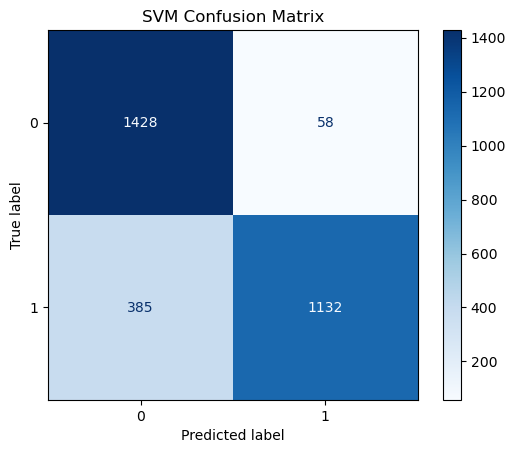

Selected features by Random Forest: Index(['merchant', 'category', 'amt', 'hour'], dtype='object')
Random Forest Acc (with feature selection): 0.97 (+/- 0.00)
Random Forest AUC (with feature selection): 1.00 (+/- 0.00)
CV Runtime for Random Forest (with feature selection): 19.15 seconds

Random Forest - Confusion Matrix:


<Figure size 500x500 with 0 Axes>

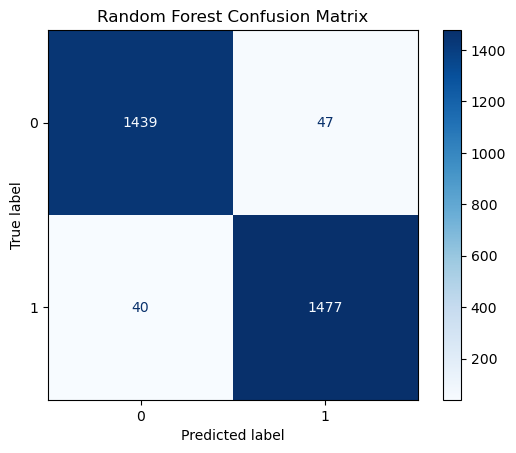

Selected features by XGBoost: Index(['category', 'amt', 'hour'], dtype='object')
XGBoost Acc (with feature selection): 0.96 (+/- 0.01)
XGBoost AUC (with feature selection): 0.99 (+/- 0.00)
CV Runtime for XGBoost (with feature selection): 0.71 seconds

XGBoost - Confusion Matrix:


<Figure size 500x500 with 0 Axes>

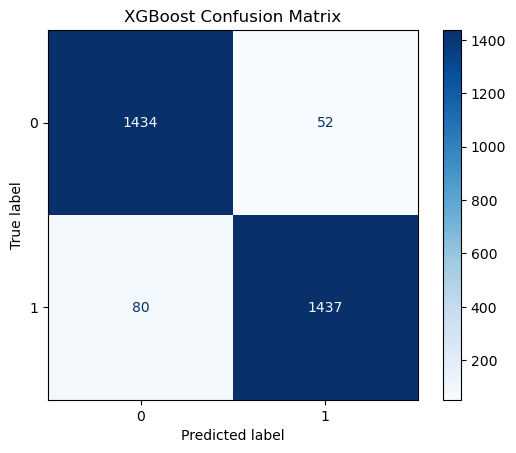

Selected features by Logistic Regression: Index(['merchant', 'category', 'amt', 'last', 'job'], dtype='object')
Logistic Regression Acc (with feature selection): 0.85 (+/- 0.01)
Logistic Regression AUC (with feature selection): 0.90 (+/- 0.02)
CV Runtime for Logistic Regression (with feature selection): 0.26 seconds

Logistic Regression - Confusion Matrix:


<Figure size 500x500 with 0 Axes>

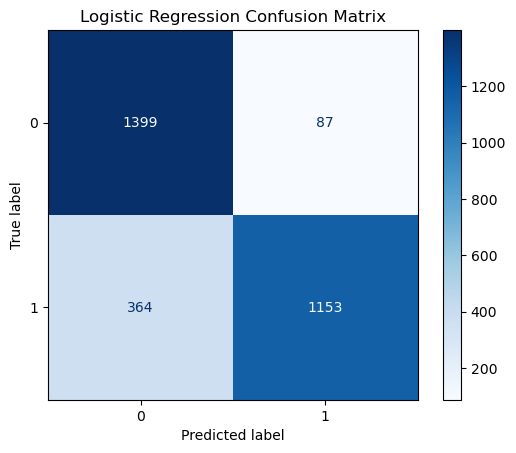

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import time

# Setup cross-validation classifier scorers
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
rand_st = 42  # Random state for reproducibility

# Define classifiers
classifiers = {
    "SVM": SVC(kernel='linear', gamma='scale', C=1.0, probability=True, random_state=rand_st),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=rand_st),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=rand_st),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', random_state=rand_st)  # Using liblinear for l1 penalty
}

# Perform feature selection, cross-validation, and plot confusion matrix for each classifier
for name, clf in classifiers.items():
    start_ts = time.time()
    
    # Feature Selection based on the training set
    sel = SelectFromModel(clf, prefit=False, threshold='mean').fit(X_train, y_train)
    X_train_sel = sel.transform(X_train)
    X_test_sel = sel.transform(X_test)
    
    # Extract and print the names of the selected features
    selected_features = X.columns[sel.get_support()]
    print(f"Selected features by {name}: {selected_features}")
    
    # Fit the classifier on selected features of the training set
    clf.fit(X_train_sel, y_train)
    
    # Perform cross-validation using the selected features
    scores = cross_validate(clf, X_train_sel, y_train, scoring=scorers, cv=5)
    scores_Acc = scores['test_Accuracy']
    scores_AUC = scores['test_roc_auc']
    
    # Print the performance metrics from cross-validation
    print(f"{name} Acc (with feature selection): {scores_Acc.mean():.2f} (+/- {scores_Acc.std() * 2:.2f})")
    print(f"{name} AUC (with feature selection): {scores_AUC.mean():.2f} (+/- {scores_AUC.std() * 2:.2f})")
    print(f"CV Runtime for {name} (with feature selection): {time.time() - start_ts:.2f} seconds\n")
    
    # Plot confusion matrix using ConfusionMatrixDisplay.from_estimator method
    print(f"{name} - Confusion Matrix:")
    plt.figure(figsize=(5, 5))  # Adjust size as necessary
    ConfusionMatrixDisplay.from_estimator(clf, X_test_sel, y_test, cmap=plt.cm.Blues, normalize=None)
    plt.title(f'{name} Confusion Matrix')
    plt.show()
